# Logistic Regression

The dataset contains 'age', sex, 'bmi'	'children', 'smoker', 'region', 'charges' where 'smoker' is target variable

In [1]:
#importing the libraries
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('insurance.csv')
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [7]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [8]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

## EDA

<AxesSubplot:>

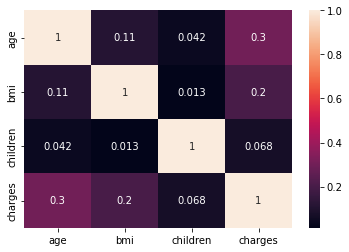

In [9]:
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='smoker', ylabel='charges'>

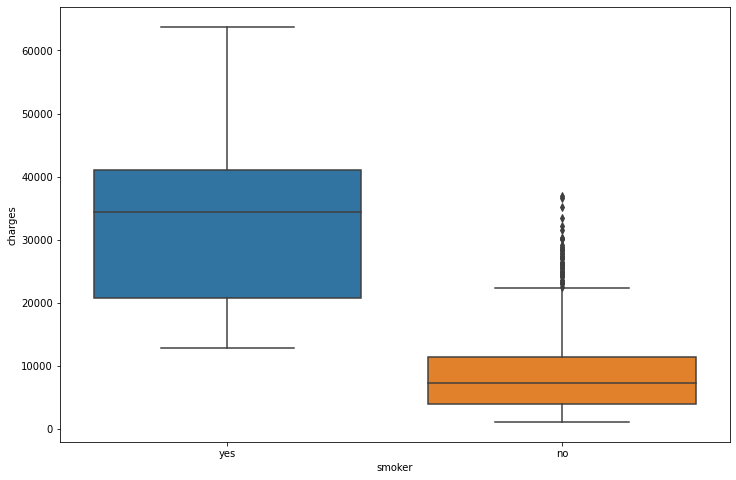

In [10]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.smoker, y=df.charges)

Smoker has more insurance charges than non smoker

<AxesSubplot:xlabel='smoker', ylabel='charges'>

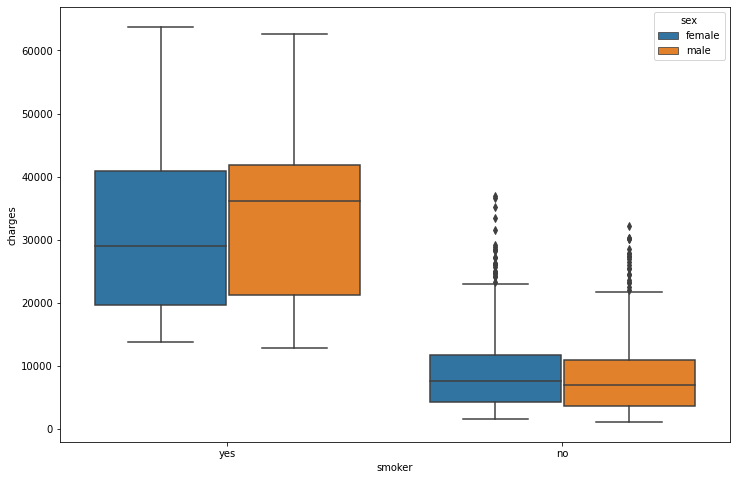

In [11]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.smoker, y=df.charges, hue=df.sex)

<AxesSubplot:xlabel='smoker', ylabel='age'>

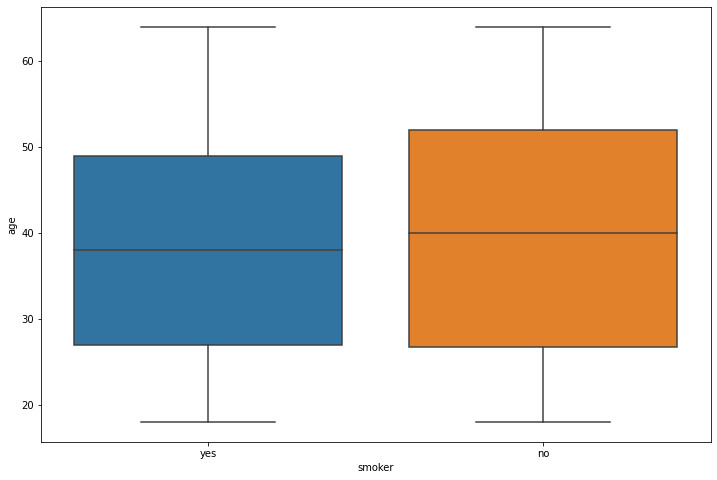

In [12]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.smoker, y=df.age)

<AxesSubplot:xlabel='smoker'>

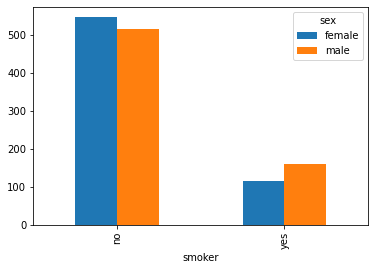

In [13]:
y = pd.crosstab(df.smoker, df.sex)

y.plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

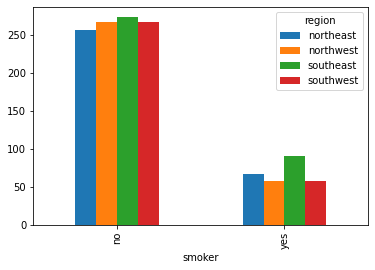

In [14]:
y = pd.crosstab(df.smoker, df.region)

y.plot(kind='bar')

<AxesSubplot:xlabel='smoker'>

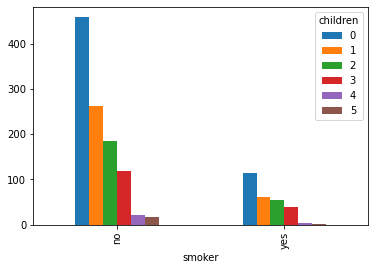

In [15]:
y = pd.crosstab(df.smoker, df.children)

y.plot(kind='bar')

<AxesSubplot:xlabel='smoker', ylabel='bmi'>

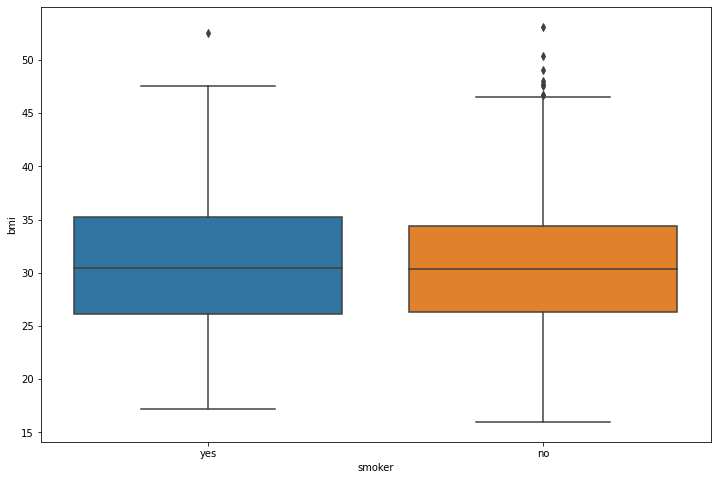

In [16]:
plt.figure(figsize=(12,8))
sns.boxplot(x=df.smoker, y=df.bmi)

### Feature Engineering

In [17]:
### Dummies are good for more than 2 columns with category
df1 = pd.get_dummies(df['region'])
df = pd.concat([df, df1], axis=1).reindex(df.index) 
df.drop('region', axis=1, inplace=True)

df1 = pd.get_dummies(df['sex']) 
df = pd.concat([df, df1], axis=1).reindex(df.index)
df.drop('sex', axis=1, inplace=True) 

df

,age,bmi,children,smoker,charges,northeast,northwest,southeast,southwest,female,male
0,19,27.900,0,yes,16884.92400,0,0,0,1,1,0
1,18,33.770,1,no,1725.55230,0,0,1,0,0,1
2,28,33.000,3,no,4449.46200,0,0,1,0,0,1
3,33,22.705,0,no,21984.47061,0,1,0,0,0,1
4,32,28.880,0,no,3866.85520,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,no,10600.54830,0,1,0,0,0,1
1334,18,31.920,0,no,2205.98080,1,0,0,0,1,0
1335,18,36.850,0,no,1629.83350,0,0,1,0,1,0
1336,21,25.800,0,no,2007.94500,0,0,0,1,1,0


In [18]:
### LabelEncoder is good for YES/NO, True or False category's
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label = le.fit_transform(df['smoker'])
df.drop("smoker", axis=1, inplace=True)
df["smoker"] = label
df

,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male,smoker
0,19,27.900,0,16884.92400,0,0,0,1,1,0,1
1,18,33.770,1,1725.55230,0,0,1,0,0,1,0
2,28,33.000,3,4449.46200,0,0,1,0,0,1,0
3,33,22.705,0,21984.47061,0,1,0,0,0,1,0
4,32,28.880,0,3866.85520,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,0,0,0,1,0
1334,18,31.920,0,2205.98080,1,0,0,0,1,0,0
1335,18,36.850,0,1629.83350,0,0,1,0,1,0,0
1336,21,25.800,0,2007.94500,0,0,0,1,1,0,0


<AxesSubplot:>

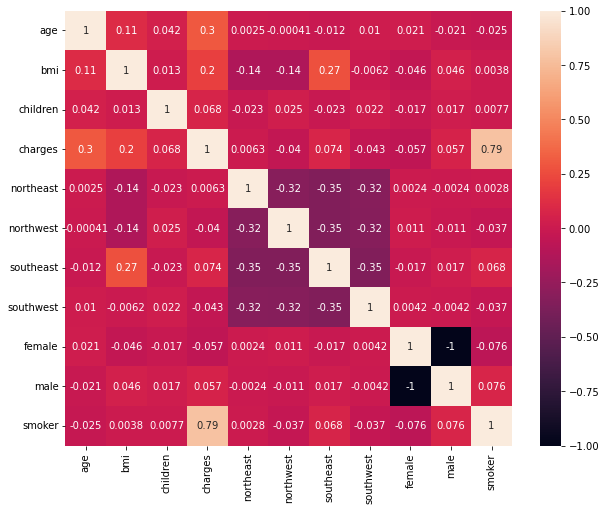

In [19]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

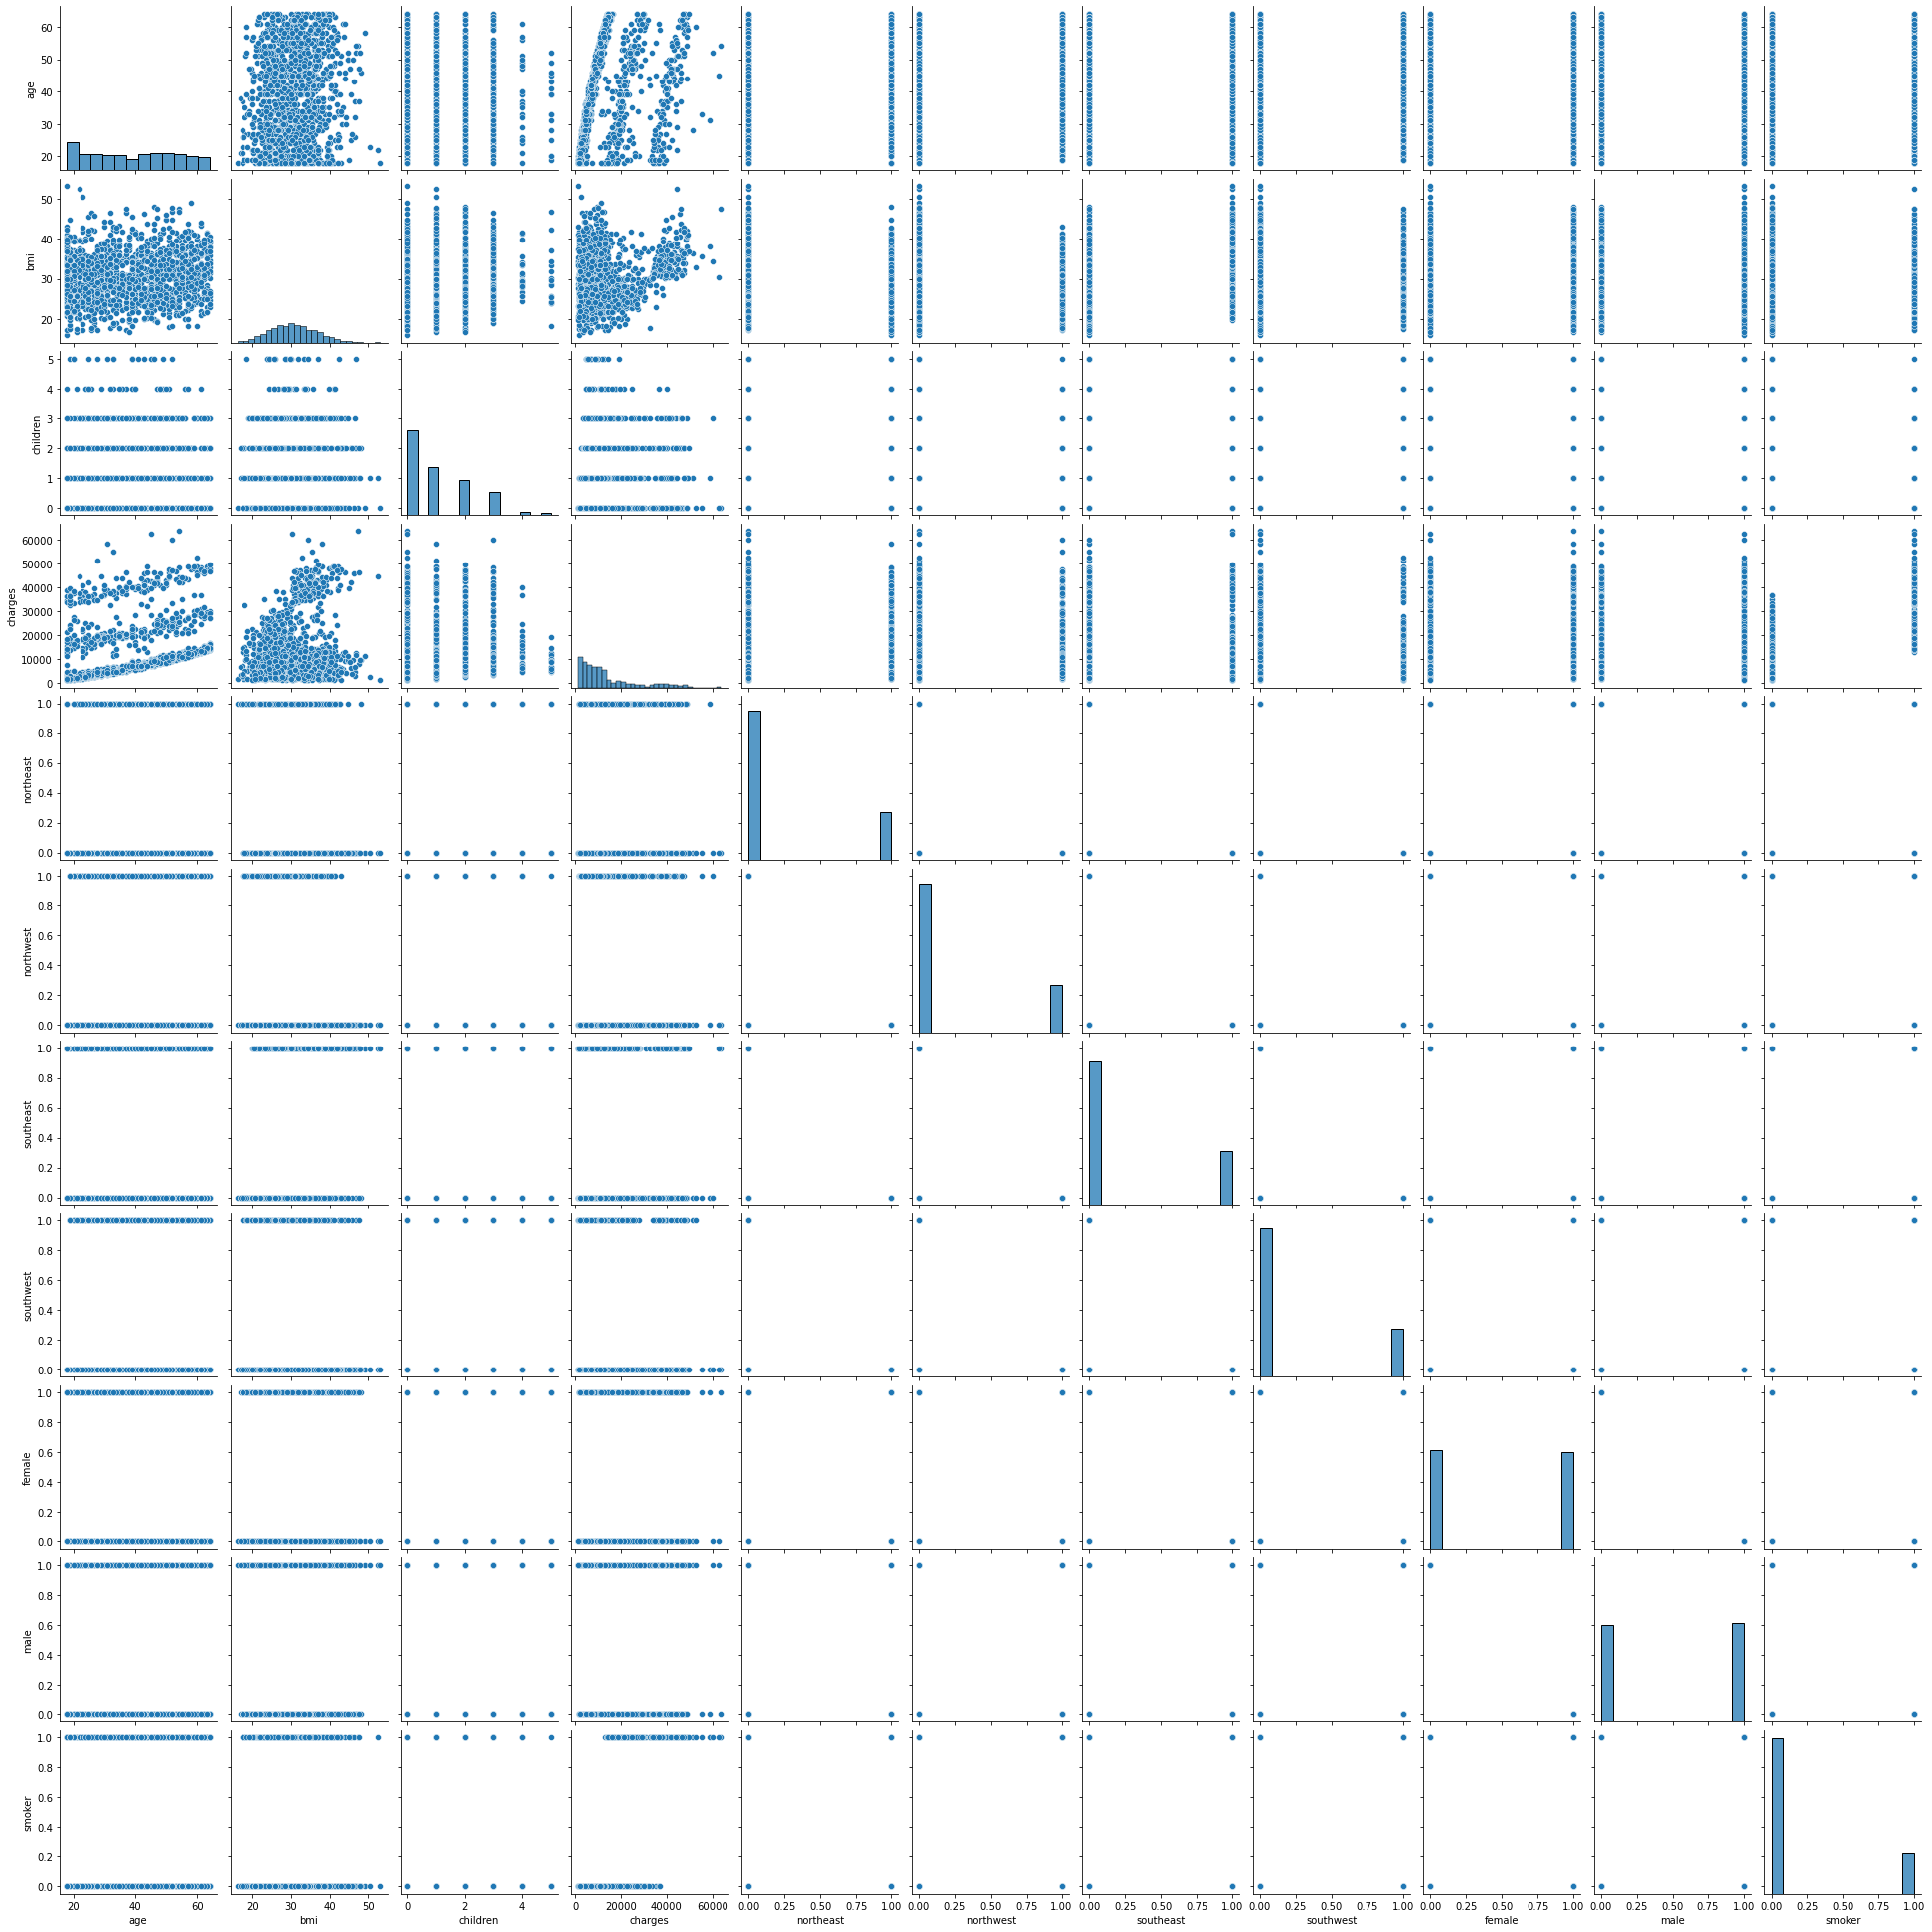

In [20]:
sns.pairplot(df)

In [21]:
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split  
from sklearn.model_selection import cross_val_predict

from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import precision_score, recall_score

In [22]:
##Train Test split
from sklearn.model_selection import train_test_split
X = df.drop('smoker',axis=1) # Independet variable
y = df['smoker'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=1)

In [23]:
len(X_train),len(X_test)

(936, 402)

In [24]:
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [25]:
y_pred=lr.predict(X_test)

In [26]:
## Classification record without cross validation

In [27]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
# Calculate various evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9353233830845771
Precision: 0.8481012658227848
Recall: 0.8271604938271605
F1-Score: 0.8374999999999999
Confusion Matrix:
[[309  12]
 [ 14  67]]


In [28]:
## K Fold Cross Validation and Confusion Matrix

In [29]:
y_train_pred = cross_val_predict(lr, X_train, y_train, cv=5)
confusion_matrix(y_train, y_train_pred)

array([[714,  29],
       [ 36, 157]], dtype=int64)

In [30]:
precision_score(y_train, y_train_pred)

0.8440860215053764

In [31]:
## Make a test prediction

In [32]:
df[34:35]

,age,bmi,children,charges,northeast,northwest,southeast,southwest,female,male,smoker
34,28,36.4,1,51194.55914,0,0,0,1,0,1,1


In [33]:
test_pass = np.array([30,36.4,1,51000,0,0,0,1,0,1]).reshape(1,-1)     ## Change age 

print(lr.predict(test_pass))
print(lr.predict_proba(test_pass))

[1]
[[6.52456555e-05 9.99934754e-01]]


In [34]:
## Likely to be a smoker bcoz predict is 1